In [1]:
"""
Focusing on things that were not done in v1.

"""


'\nFocusing on things that were not done in v1.\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

In [4]:
# load all sessions for Pancho on 221020
MS = load_mult_session_helper(230615, 'Diego')

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-104852
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-105514
session:  0
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many paths:
2
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-104852
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230615/Diego-230615-105514
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
Beh Sessions that exist on this date:  {230615: [(2, 'priminvar5'), (3, 'priminvar5')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['priminvar5']
Loading these beh sessions: [2]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230615*/**
Found this many pat

### Saving local cached data

In [5]:

sn = MS.SessionsList[0]
sn._MapperTrialcode2TrialToTrial

{'230615-2-1': 0,
 '230615-2-2': 1,
 '230615-2-3': 2,
 '230615-2-4': 3,
 '230615-2-5': 4,
 '230615-2-6': 5,
 '230615-2-7': 6,
 '230615-2-8': 7,
 '230615-2-9': 8,
 '230615-2-10': 9,
 '230615-2-11': 10,
 '230615-2-12': 11,
 '230615-2-13': 12,
 '230615-2-14': 13,
 '230615-2-15': 14,
 '230615-2-16': 15,
 '230615-2-17': 16,
 '230615-2-18': 17,
 '230615-2-19': 18,
 '230615-2-20': 19,
 '230615-2-21': 20,
 '230615-2-22': 21,
 '230615-2-23': 22,
 '230615-2-24': 23,
 '230615-2-25': 24,
 '230615-2-26': 25,
 '230615-2-27': 26}

In [11]:
for sn in MS.SessionsList:
    sn._savelocalcached_save(save_dataset_beh=False, save_datslices=False, ONLY_EXTRA_STUFF=True)

### Snippets

Collects data aligned to instances of a given event. Can then use the Snippets methods to do many things, plotting, analysis, etc.

In [10]:
from neuralmonkey.classes.snippets import Snippets, extraction_helper


In [7]:
# Pick out a single session
sn = MS.SessionsList[0]


In [8]:
# Turn on debug mode, this prunes sites and trials, so below runs faster
DEBUG = True
sn._DEBUG_PRUNE_SITES = DEBUG
sn._DEBUG_PRUNE_TRIALS = DEBUG


In [ ]:
# ****** FOR KEDAR: you would want to modify list_events to something like this:
list_events = ["saccon", "saccoff"]


In [9]:
# Main code for extracting Snippets (SP)

# == MODIFY THESE:
list_events = ["samp"]
list_pre_dur = [-0.5]
list_post_dur = [0.5]

# == IGNORE THESE:
which_level = "trial"
list_features_extraction = []
list_features_get_conjunction = []
trials_prune_just_those_including_events=False

SP = Snippets(sn,
    which_level,
    list_events,
    list_features_extraction,
    list_features_get_conjunction,
    list_pre_dur,
    list_post_dur,
    strokes_only_keep_single=False,
    tasks_only_keep_these=None,
    prune_feature_levels_min_n_trials=None,
    dataset_pruned_for_trial_analysis=None,
    trials_prune_just_those_including_events=trials_prune_just_those_including_events,
    fr_which_version='sqrt',
    NEW_VERSION=True,
    SKIP_DATA_EXTRACTION=False
             )



 == extarcating these sites:  [1000, 1032, 1058, 1094, 1131, 1160, 1175, 1205, 1238, 1259, 1279, 1298, 1324, 1352, 1389]


AssertionError: this on by defualt. if turn off, then change line below in SN.get_trials_list

In [12]:
which_level = "trial"
PRE_DUR = -0.6
POST_DUR = 0.6
EVENTS_KEEP = ["03_samp"]
SP = extraction_helper(sn, which_level, PRE_DUR=PRE_DUR, POST_DUR=POST_DUR,
                        EVENTS_KEEP=EVENTS_KEEP) 


Kept these events:  ['samp']

 == extarcating these sites:  [1000, 1032, 1058, 1094, 1131, 1160, 1175, 1205, 1238, 1259, 1279, 1298, 1324, 1352, 1389]

 == extracting these trials:  [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 20, 21, 22, 23, 25]
03_samp  -  0
Extracting smoothed FR for all data...
Inserting smoothed FR into dataset...
** Generated Snippets, (ver trial). Final length of SP.DfScalar: 300
Keeping this many sites that pass fr thresh:
12 / 15
Using threshold:  1.5
Updated self.Sites


In [15]:
# Inspect the data. 
# Each row represents a single combination of:
# (trial, chan, event). To see that, inspect the output of 

display(SP.DfScalar)

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(SP.DfScalar, ["trialcode", "chan", "event_aligned"])


,trialcode,chan,event_unique_name,event_aligned,spike_times,trial_neural,event_time,idx_trialtime,event_idx_within_trial,fr_sm,fr_sm_times,event,fr_scalar_raw,fr_scalar,fr_sm_sqrt,session_idx
0,230615-2-1,1000,03_samp,03_samp,[],0,3.051566,0,0,"[[9.951582668842806e-16, 4.256771364533869e-16...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,0.000000,0.000000,"[[3.154612919019195e-08, 2.0631944563064987e-0...",0
1,230615-2-1,1032,03_samp,03_samp,"[-0.5548408431086074, -0.5231787598664077, -0....",0,3.051566,0,0,"[[22.505506711757, 20.17152476482207, 20.43460...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,45.833333,6.770032,"[[4.743996913126842, 4.491272065330943, 4.5204...",0
2,230615-2-1,1058,03_samp,03_samp,"[-0.4478123521488868, -0.4021009874680459, -0....",0,3.051566,0,0,"[[2.5912452660277925, 1.1327557934900454, 0.42...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,19.166667,4.377975,"[[1.6097345327810397, 1.0643100081696335, 0.65...",0
3,230615-2-1,1094,03_samp,03_samp,"[-0.5984222875713456, -0.5757714052518956, -0....",0,3.051566,0,0,"[[91.21923302672693, 94.66850151215738, 96.226...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,127.500000,11.291590,"[[9.550876034517824, 9.72977397025015, 9.80951...",0
4,230615-2-1,1131,03_samp,03_samp,"[0.11555154553957436, 0.5409211890974248]",0,3.051566,0,0,"[[2.511370185592192, 1.1131780442929926, 0.425...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,1.666667,1.290994,"[[1.5847303195156557, 1.0550725303470812, 0.65...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,230615-2-26,1279,03_samp,03_samp,"[-0.41558785907309925, -0.1582771127245053, 0....",25,1.997206,19,0,"[[0.0003778751707258357, 5.9468780593001486e-0...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,2.500000,1.581139,"[[0.019439011567614125, 0.007711600391164047, ...",0
296,230615-2-26,1298,03_samp,03_samp,"[-0.3949030569549734, 0.18754820268802064, 0.3...",25,1.997206,19,0,"[[0.0, 0.0, 0.0, 0.0, 4.2106236193191124e-16, ...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,3.333333,1.825742,"[[0.0, 0.0, 0.0, 0.0, 2.0519804139706383e-08, ...",0
297,230615-2-26,1324,03_samp,03_samp,"[-0.5826227561774715, -0.5077069085060941, -0....",25,1.997206,19,0,"[[14.96445012591238, 16.393430688649428, 15.97...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,18.333333,4.281744,"[[3.8683911547195406, 4.048880177116807, 3.996...",0
298,230615-2-26,1352,03_samp,03_samp,"[-0.5520665930485222, -0.46351106398046227, -0...",25,1.997206,19,0,"[[4.886719100881344, 8.201413545351887, 11.872...","[[-0.595, -0.5849999999999997, -0.575, -0.5649...",03_samp,11.666667,3.415650,"[[2.2105924773420687, 2.8638110177439935, 3.44...",0


('230615-2-1', 1000, '03_samp') :     1
('230615-2-1', 1032, '03_samp') :     1
('230615-2-1', 1058, '03_samp') :     1
('230615-2-1', 1094, '03_samp') :     1
('230615-2-1', 1131, '03_samp') :     1
('230615-2-1', 1160, '03_samp') :     1
('230615-2-1', 1175, '03_samp') :     1
('230615-2-1', 1205, '03_samp') :     1
('230615-2-1', 1238, '03_samp') :     1
('230615-2-1', 1259, '03_samp') :     1
('230615-2-1', 1279, '03_samp') :     1
('230615-2-1', 1298, '03_samp') :     1
('230615-2-1', 1324, '03_samp') :     1
('230615-2-1', 1352, '03_samp') :     1
('230615-2-1', 1389, '03_samp') :     1
('230615-2-10', 1000, '03_samp') :     1
('230615-2-10', 1032, '03_samp') :     1
('230615-2-10', 1058, '03_samp') :     1
('230615-2-10', 1094, '03_samp') :     1
('230615-2-10', 1131, '03_samp') :     1
('230615-2-10', 1160, '03_samp') :     1
('230615-2-10', 1175, '03_samp') :     1
('230615-2-10', 1205, '03_samp') :     1
('230615-2-10', 1238, '03_samp') :     1
('230615-2-10', 1259, '03_samp'

{('230615-2-1', 1000, '03_samp'): 1,
 ('230615-2-1', 1032, '03_samp'): 1,
 ('230615-2-1', 1058, '03_samp'): 1,
 ('230615-2-1', 1094, '03_samp'): 1,
 ('230615-2-1', 1131, '03_samp'): 1,
 ('230615-2-1', 1160, '03_samp'): 1,
 ('230615-2-1', 1175, '03_samp'): 1,
 ('230615-2-1', 1205, '03_samp'): 1,
 ('230615-2-1', 1238, '03_samp'): 1,
 ('230615-2-1', 1259, '03_samp'): 1,
 ('230615-2-1', 1279, '03_samp'): 1,
 ('230615-2-1', 1298, '03_samp'): 1,
 ('230615-2-1', 1324, '03_samp'): 1,
 ('230615-2-1', 1352, '03_samp'): 1,
 ('230615-2-1', 1389, '03_samp'): 1,
 ('230615-2-10', 1000, '03_samp'): 1,
 ('230615-2-10', 1032, '03_samp'): 1,
 ('230615-2-10', 1058, '03_samp'): 1,
 ('230615-2-10', 1094, '03_samp'): 1,
 ('230615-2-10', 1131, '03_samp'): 1,
 ('230615-2-10', 1160, '03_samp'): 1,
 ('230615-2-10', 1175, '03_samp'): 1,
 ('230615-2-10', 1205, '03_samp'): 1,
 ('230615-2-10', 1238, '03_samp'): 1,
 ('230615-2-10', 1259, '03_samp'): 1,
 ('230615-2-10', 1279, '03_samp'): 1,
 ('230615-2-10', 1298, '03_

##### Plotting functions for Snippets

In [16]:
SP.Sites

[1032, 1058, 1094, 1160, 1175, 1205, 1238, 1279, 1298, 1324, 1352, 1389]

(<Figure size 210x350 with 1 Axes>, <Axes: ylabel='trial'>)

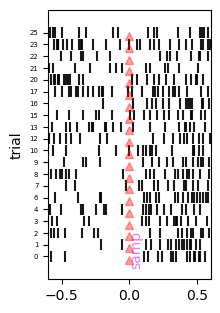

In [25]:
chan = 1389
SP.plotgood_rasters(chan)

In [ ]:
site =2
event=None


fig, axesall = plt.subplots(1,2)

# 1) Plot the rasters ont he top row.
# axes = axesall[0]
ax = axesall.flatten()[0]
SP.plotgood_rasters(site, event, ax)    

# SP.plotgood_rasters(chan)

(<Figure size 231x700 with 2 Axes>,
 array([[<Axes: ylabel='trial'>],
        [<Axes: >]], dtype=object))

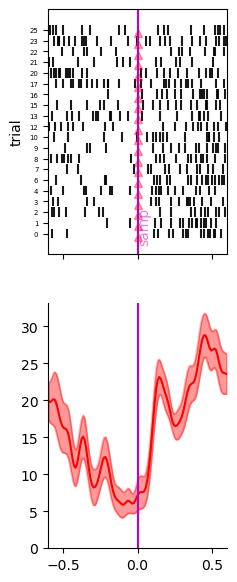

In [26]:
SP.plotgood_rasters_smfr_combined(chan)

In [31]:
SP.datasetbeh_append_column("seqc_0_shape")

Snippets -- extracting beh dataset for first time! (concatting and tokens preprocess)
Generated index mappers!
Updating this column of self.DfScalar with Dataset beh:
seqc_0_shape


(<Figure size 231x700 with 2 Axes>,
 array([[<Axes: title={'center': "('dummy',)"}, ylabel="('dummy',)">],
        [<Axes: title={'center': "('dummy',)"}>]], dtype=object))

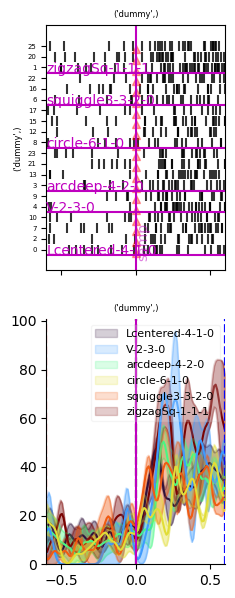

In [42]:
# Rasters and smoothed FR, split by event
chan = SP.Sites[4]
chan = 1058
event = "03_samp"
SP.plotgood_rasters_smfr_each_level_combined(chan, var="seqc_0_shape", event=event, OVERWRITE_n_min=1)

In [ ]:
# you can further split data based on conjucntions of another set of variables.

# For example, let's make that same plot, but split subplots by epoch.
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch"]) # plot


In [ ]:
# We can plot the same data, but flipping which variable
SP.plotgood_rasters_smfr_each_level_combined(chan, var="epoch", vars_others=["event"]) # plot


In [ ]:
# You can even use conjucjtions of mltiple variables for splitting suybplots
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.datasetbeh_append_column("block", sn.Datasetbeh) # assign epoch to SP

SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch", "block"]) # plot

# Now each subplot is a specific conjucntion of the variables epoch and block.

### Computing modulation of activity by certain variables

For each site, compute how strongly it is modulated by a specific variable, computed 
separatedly for each event.

In [38]:
# First, append the variables that you wish to analyze
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP


Updating this column of self.DfScalar with Dataset beh:
epoch


In [39]:
if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)
    SP.globals_update(globals_nmin=2)


{'n_min_trials_per_level': 5, 'lenient_allow_data_if_has_n_levels': 2, 'PRE_DUR_CALC': -0.6, 'POST_DUR_CALC': 0.6, 'list_events': ['03_samp'], 'list_pre_dur': [-0.6], 'list_post_dur': [0.6]}
Updated self.ParamsGlobals:
n_min_trials_per_level  =  2
lenient_allow_data_if_has_n_levels  =  2
PRE_DUR_CALC  =  -0.6
POST_DUR_CALC  =  0.6
list_events  =  ['03_samp']
list_pre_dur  =  [-0.6]
list_post_dur  =  [0.6]


In [40]:
# Run this to compute modulation
var = "seqc_0_shape"
DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event = SP.modulationgood_compute_wrapper(var, 
                                                                                        DEBUG_CONJUNCTIONS=False, 
                                                                                        THINGS_TO_EXTRACT=["anova"])


Running grouping_print_n_samples...
DOing these! ...
list_events ['03_samp']
list_pre_dur [-0.6]
list_post_dur [0.6]
GOOD!, enough data, max n per grouping conjunction (nmin, nmax)  2 4
 
Updated ParamsGlobals for event 03_samp to:
Updated self.ParamsGlobals:
n_min_trials_per_level  =  2
lenient_allow_data_if_has_n_levels  =  2
PRE_DUR_CALC  =  -0.6
POST_DUR_CALC  =  0.6
list_events  =  ['03_samp']
list_pre_dur  =  [-0.6]
list_post_dur  =  [0.6]
DOING THIS EVENT:  03_samp_-600_to_600
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
site : 1160
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])
dict_keys(['03_samp'])


In [41]:
DF_VAR

,chan,var,var_others,lev_in_var_others,_event,event,val_kind,val_method,val,val_zscore,bregion,n_datapts,dummy_var
0,1032,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.014675,NaN,M1_l,20,dummy
1,1058,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.066660,NaN,PMv_l,20,dummy
2,1094,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.021910,NaN,PMv_m,20,dummy
3,1160,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.055378,NaN,PMd_a,20,dummy
4,1175,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.004444,NaN,dlPFC_a,20,dummy
5,1205,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.017889,NaN,vlPFC_p,20,dummy
6,1238,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,-0.106088,NaN,vlPFC_a,20,dummy
7,1279,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,-0.001158,NaN,FP_a,20,dummy
8,1298,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.002753,NaN,SMA_p,20,dummy
9,1324,seqc_0_shape,"(dummy_var,)","(dummy,)",03_samp,03_samp_-600_to_600,modulation_subgroups,r2smfr_minshuff,0.001880,NaN,SMA_a,20,dummy


In [ ]:
# Plot results and save
sdir_base = "/tmp"
SP.modulationgood_plot_WRAPPER(DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event, 
                               var="epoch", vars_conjuction=["dummy_var"],
                               sdir_base=sdir_base, N_WAYS=1)

### Modulation by time (relative to aligned events)

For each site x event, compute a scalar value indiicating how much its actiivyt is modulated
with respect to this event. This moudlation can be increase in fr, decrease, or any
activity pattern that is consistent across trials.

In [ ]:
# Extract modulation, for each site x event

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import preprocess_and_extract
from neuralmonkey.analyses.event_temporal_modulation import plot_overview

df_modtime = preprocess_and_extract(SP)


In [ ]:
# Plot overview of modulation

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import plot_overview
SAVEDIR = "/tmp"
##################### PLOTS
plot_overview(df_modtime, SP, SAVEDIR)